<a href="https://colab.research.google.com/github/th4tkh13m/goodreads-review/blob/main/nbs/GoodRead_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoodReads Review to Rating Notebook

## I. Import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path
from zipfile import ZipFile

## II. Prepare Data

### 1. Install kaggle and get data from Kaggle

In [ ]:
## Install kaggle for data
%pip install -q kaggle

In [ ]:
from google.colab import files 
file = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
kaggle_path = f"{os.getenv('HOME')}/.kaggle"
kaggle = Path(kaggle_path)
kaggle.mkdir(parents=True)


os.replace("kaggle.json", os.path.join(kaggle_path, "kaggle.json"))
os.chmod(os.path.join(kaggle_path, "kaggle.json"), 0o600)

In [ ]:
! kaggle competitions download -c goodreads-books-reviews-290312

 98% 620M/635M [00:05<00:00, 144MB/s]
100% 635M/635M [00:05<00:00, 129MB/s]


### 2. Unzip and move data to its specific folders

In [ ]:


zip_file = ZipFile("goodreads-books-reviews-290312.zip")
zip_file.extractall()

In [ ]:
data_path = "data"
train_path = os.path.join(data_path, "train")
test_path = os.path.join(data_path, "test")
for path in (train_path, test_path):
  os.makedirs(path)

## Move train
os.replace("./goodreads_train.csv", os.path.join(train_path, "goodreads_train.csv"))
os.replace("./goodreads_test.csv", os.path.join(test_path, "goodreads_test.csv"))

### 3. Loading data

In [ ]:
train_data = pd.read_csv(os.path.join(train_path, "goodreads_train.csv"))

In [ ]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


## III. Data Exploration

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


There are 11 columns in the dataset with exactly 900000 comments. Most of the columns are not null, but there are still some null columns, such as `read_at`, `started_at`. There are some initial thoughts of why these are nulls, such as:
* The reviewers did not read the book but still give reviews.
* They may forget to update these information.

We will look at our data again to get some basic sense.

In [ ]:
train_data.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1
4,8842281e1d1347389f2ab93d60773d4d,25884323,332732725863131279a8e345b63ac33e,4,"I really enjoyed this book, and there is a lot...",Mon Apr 25 09:31:23 -0700 2016,Mon Apr 25 09:31:23 -0700 2016,Sun Jun 26 00:00:00 -0700 2016,Sat May 28 00:00:00 -0700 2016,9,1


We also check the columns of the dataset.

In [ ]:
train_data.columns

Index(['user_id', 'book_id', 'review_id', 'rating', 'review_text',
       'date_added', 'date_updated', 'read_at', 'started_at', 'n_votes',
       'n_comments'],
      dtype='object')

Based on the columns and the dataset, we can safely assume that there are 2 types of data in the dataset: categorical data and the numerical data.

* Numerical data columns are: `rating`, `n_votes`, `n_comments`.
* Categorical data columns are the remaining coumns: `user_id`, `book_id`, `review_id`, `review_text`, `date_added`, `date_updated`, `read_at`, `started_at`


We can start by learning about the numerical features first. Let's look at some basic statistics.

In [ ]:
train_data[["rating", "n_votes", "n_comments"]].describe()

,rating,n_votes,n_comments
count,900000.000000,900000.000000,900000.000000
mean,3.689639,3.294381,1.016656
std,1.252583,17.873553,5.963821
min,0.000000,-3.000000,-1.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000
max,5.000000,3222.000000,1335.000000


The `describe` table showed us many notable information:
* The `rating` column may be right-skewed as its Q3 is already the max rating (5.0 point or 5 stars)
* `n_votes` and `n_comments` are heavily left-skewed.
*  <b>ATTENTION</b>: `n_votes` 's min is -3, with is impossible. Goodreads does not have downvote feature.
*  <b>ATTENTION</b>: `n_comments` 's min is -1, with is also impossible. 


We will plot boxplots of the numerical columns to verify the first 2 thoughts.

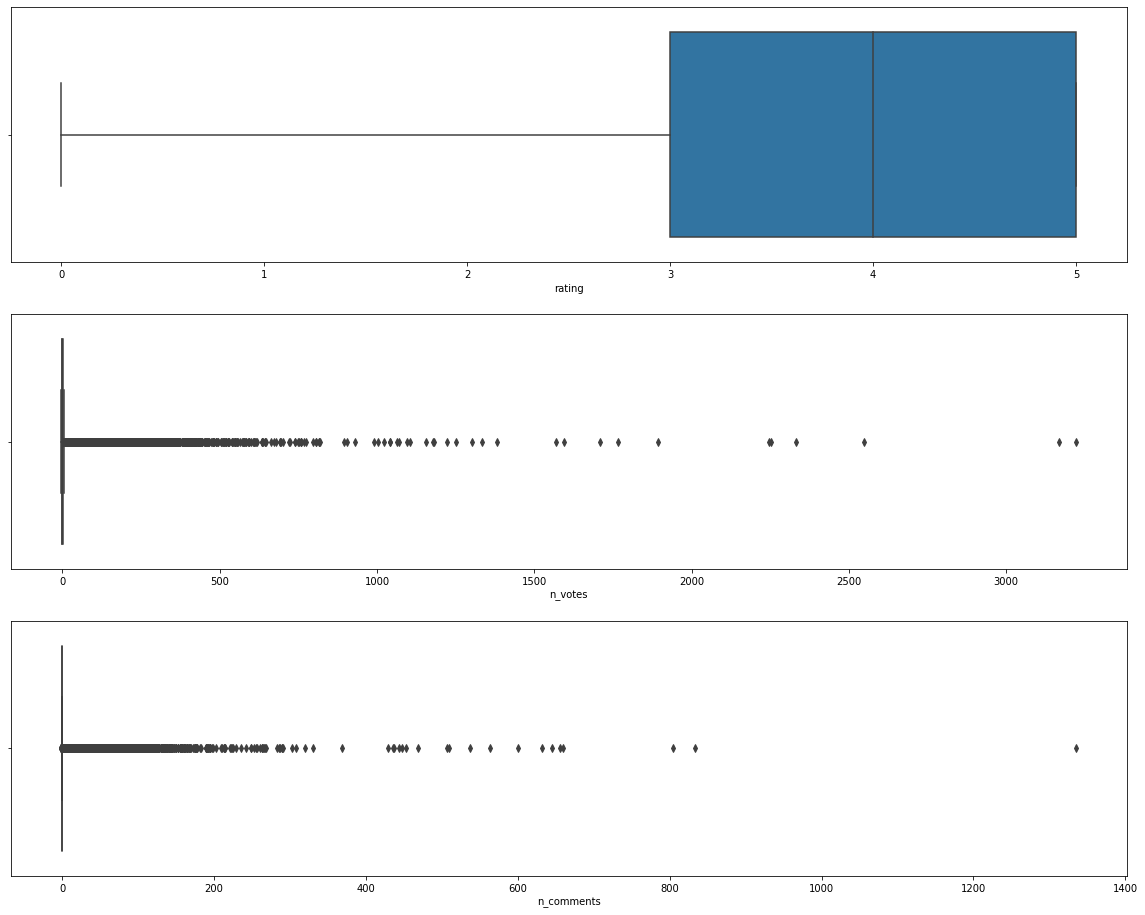

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,16))
sns.boxplot(data=train_data, x="rating", ax=ax[0])
sns.boxplot(data=train_data, x="n_votes", ax=ax[1])
sns.boxplot(data=train_data, x="n_comments", ax=ax[2])

Since there are so many outliers in `n_comments` and `n_votes`, we would zoom in the plots where most of the comments and votes are.

[(-10.0, 20.0)]

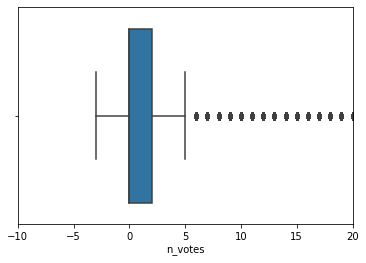

In [ ]:
sns.boxplot(data=train_data, x="n_votes").set(xlim=(-10,20))

[(-5.0, 5.0)]

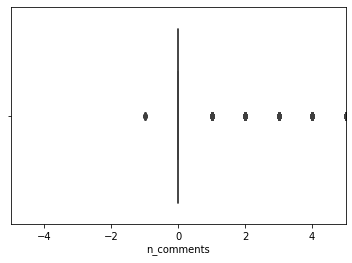

In [ ]:
sns.boxplot(data=train_data, x="n_comments").set(xlim=(-5,5))

We can see that `n_votes` and `n_comments` have a lot of outliers. We may consider drop of those outliers or not. 

* Dropping outliers of `n_votes` is undesired, because highly upvotes reviews are likely to be more reputable than lower upvotes reviews, as other readers should find these reviews to be more helpful.

* We must investigate whether should we drop `n_comments` outliers. We may think that the larger `n_comments` is, the more arguable and debatable the review is. Another hypothesis is, that review is a helpful one, which indicates in an enormous gratefully comments.

In [ ]:
train_data[train_data["n_comments"] < 0]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
13007,feafbae6a2cf100c84a712edd03e930d,1828067,aef92262bb2cda22247768affe7582b9,2,"I haven't had much luck finding new, entertain...",Mon Aug 20 08:45:24 -0700 2012,Mon Aug 20 09:14:14 -0700 2012,Sat Aug 18 00:00:00 -0700 2012,Fri Aug 17 00:00:00 -0700 2012,7,-1
13045,feafbae6a2cf100c84a712edd03e930d,17645,29a5a6522bfc6496ec5a55efedcceef6,3,I finished rereading this and found it conside...,Thu Dec 04 15:29:13 -0800 2008,Sun Jul 26 19:29:33 -0700 2015,Wed Jul 04 00:00:00 -0700 2012,Wed Jul 04 00:00:00 -0700 2012,2,-1
157212,06e1a327fd336d7eee74aa62f1275386,12031532,c1a21535a8c1c180fc5296b47dbc9a78,3,Sometimes it hurts to give a book three stars....,Wed Nov 07 04:20:45 -0800 2012,Mon Nov 19 18:35:57 -0800 2012,Mon Nov 19 00:00:00 -0800 2012,Wed Nov 07 00:00:00 -0800 2012,4,-1
229164,b0ed09d14a462cb2d27327b87edf6f68,13049688,ea18fbf5e281ac1b2651afded38406d9,1,"Not feeling this one. I don't mind dark, but t...",Wed Mar 27 12:52:09 -0700 2013,Fri Nov 25 08:50:17 -0800 2016,NaN,Wed Mar 27 00:00:00 -0700 2013,1,-1
570065,3687fcc87a9c2d733df8cfc43ae8dcfe,26860475,9235c340d5beef19271ba880c9db559b,4,The review is for Life and Death only. \n 3.5/...,Tue Oct 06 16:01:41 -0700 2015,Sun Aug 20 10:41:24 -0700 2017,Fri Oct 09 00:00:00 -0700 2015,Tue Oct 06 00:00:00 -0700 2015,6,-1
622493,26b6d2e8d2c2e2f76a70a3359ba76c6a,17572903,bbcd01ffb27e53927825506ad3346ad5,4,My new historical fiction interest is WWI. \n ...,Wed Jul 31 16:46:13 -0700 2013,Tue Feb 11 20:31:08 -0800 2014,Wed Jul 31 00:00:00 -0700 2013,NaN,9,-1
796721,f2caf50868a530b15ecbb9b3273837e7,13163011,5c237482cc755b72364778bc85b59ce2,3,Enjoyed this more than the first in that the s...,Thu Aug 16 13:45:54 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Thu Aug 16 00:00:00 -0700 2012,1,-1
796728,f2caf50868a530b15ecbb9b3273837e7,4912857,aa057f840d2b35d8551c870299e71fc2,4,"Sometimes when I REALLY enjoy a book, I have t...",Thu Jun 28 10:55:02 -0700 2012,Thu Jul 26 09:06:06 -0700 2012,Wed Jul 11 00:00:00 -0700 2012,Thu Jun 28 00:00:00 -0700 2012,0,-1


In [ ]:
train_data[train_data["n_votes"] < 0]

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
24277,2138f2f7e5d766220af5a36e7dc0c9e1,17290243,ea4ebd538962fc35035617c001a77b00,5,Originally at The Secret Life of a Bookworm \n...,Sat Jun 29 00:33:51 -0700 2013,Mon Nov 03 14:48:37 -0800 2014,Sat Jan 11 00:00:00 -0800 2014,Thu Jan 09 00:00:00 -0800 2014,-1,0
35831,1b253d9d46a0ee269d7a0b85c1cc2467,17449197,f9779e8e7d7f716b68a376f8db505bbc,5,The next book. Give. Me. The. Next. Book.,Sat Jun 22 02:18:59 -0700 2013,Thu Mar 24 08:28:05 -0700 2016,Thu Jan 09 05:46:04 -0800 2014,Wed Jan 08 00:00:00 -0800 2014,-1,4
54619,8522eba1011e52d7672f9d9aeccc044c,12926132,e3a36bb4eb8322c1449ed0ff2d2c86c3,5,Hands down this is the best piece of YA litera...,Sat Sep 01 21:58:34 -0700 2012,Mon Nov 03 14:38:46 -0800 2014,Thu Aug 30 00:00:00 -0700 2012,NaN,-2,0
89919,8e0e3e8e71e707de6a6b659cae0c18e8,17976745,05c883bfeb06ad7518520026487c21fd,5,Crazy amazing book! Loved it!,Mon Jul 15 12:53:34 -0700 2013,Mon Nov 03 14:49:54 -0800 2014,Mon Jul 15 20:42:17 -0700 2013,Mon Jul 15 00:00:00 -0700 2013,-1,0
106275,aca760854b57ce2ec981df32e46dc96c,49041,5f14abad06438d50a2ca9f94d24436ac,5,it was cute \n but I can see why it was remove...,Sun Aug 02 22:07:27 -0700 2009,Fri Aug 15 16:59:05 -0700 2014,NaN,NaN,-1,3
110253,9c705d573943f354e90b5d033871e894,59264,eac9389573a0958af0a15fa1ead3e728,5,I'm bored so I'm going to review this #12 \n R...,Sat Oct 27 21:25:07 -0700 2012,Sat Oct 27 21:58:45 -0700 2012,NaN,NaN,-3,1
119517,a413371aecc682414eb9c712a1c4187c,16150831,63e1784fee1579c76b550f518d7af995,0,"IT HAS A TITLE, WHAT!?!?!?!?!? \n The darkest ...",Thu Oct 17 20:38:50 -0700 2013,Sun Mar 20 20:22:06 -0700 2016,NaN,NaN,-2,1
186138,6478d1ff3d540bad79cb7976b6bec8fc,25689074,b45639c234340b0db53a04cf537a8284,0,Oh my goodness. \n Oh my god. \n Jacin and Win...,Sat Dec 12 08:20:07 -0800 2015,Fri Apr 08 00:55:59 -0700 2016,NaN,NaN,-1,0
215484,d91b6d7a69d077299f160925ff777be4,16085457,8ac49bd0429ba37f14652cb5344acb8e,5,A satisfying conclusion,Sat Nov 15 20:55:56 -0800 2014,Fri Nov 28 14:32:07 -0800 2014,Fri Nov 28 14:32:07 -0800 2014,Sat Nov 15 00:00:00 -0800 2014,-2,0
239527,50f10a4db23bc44b02601a7518734294,7204637,a6c21432681b18ab786224dc438114c1,2,"I always feel bad giving books bad ratings, es...",Wed Aug 14 15:40:35 -0700 2013,Wed Aug 28 11:37:31 -0700 2013,Sat Aug 17 09:20:55 -0700 2013,Wed Aug 14 00:00:00 -0700 2013,-1,0
